# AerE 160 Computer Lab #4, Fall 2021

## Rocket simulation

Name: Nick McCullough

ISU Email: nickmcc@iastate.edu

Section #: 1

Lab TA: Harsha Sista



In [22]:
%matplotlib notebook
# (Remove the above line for Spyder; 
# you will need to type '%matplotlib qt' into the command window instead.)
import numpy as np
from matplotlib import pyplot as pl

In this lab we will be simulating rocket trajectories. In the cells below there are a series of components that you will be able to assemble into your rocket trajectory. At the very bottom is a template for doing the assembly. However before we can do any of that we need some extra tools.

Unfortunately not all of what we need will be available in Jupyter. In particular the interactive portion (clicking or using the keyboard to adjust the rocket direction) does not work. 

We will get started here in Jupyter, then you can copy and paste your segments of code into Spyder. You will also need the "pint" units package from the previous lab installed.

To install "pint" into Anaconda, you need to open an "Anaconda Prompt" and then enter `conda install -c conda-forge pint`. You will need to tell it to proceed when asked. If you installed Anaconda as an administrator you will need to run the Anaconda Prompt as an administrator as well in order to do the installation. 

Once `pint` is installed you should be able to execute `import pint` at the Spyder prompt or inside Jupyter without an error.

In [23]:
import pint
ur = pint.UnitRegistry() # Import pint and create unit registry

### 2. Rocket and planet characteristics; physics constants

Define variables representing rough parameters of a SpaceX Falcon 9 rocket, but treating it as a single stage rocket. Use an empty mass of 29500 kg, a payload of 1000 kg, and a fuel mass of 
480000 kg. Thrust Specific Fuel Consumption is roughly $3.5\times 10^{-4}$ s/m and full thrust is approximately 7600 kN. 

You will also need variables to store astronomical data: 
The gravitational constant G is $6.674 \times 10^{-11}$ m$^{3}$/(kg s$^{2}$) and Earth's mass is approximately $5.98 \times 10^{24}$ kg.

Store all these values in suitably-named variables with correct units.

In [24]:
empty_mass = 29500 * ur.kg
payload_mass = 1000 * ur.kg
fuel_mass = 480000 * ur.kg
tsfc = .00035 * (ur.s/ur.m)
full_thrust = 7600 * ur.kN
G = (6.674 * 10**-11) * ((ur.m**3)/(ur.kg*ur.s**2))
earth_mass = (5.98 * 10**24) * (ur.kg)

## Vectors
You are hopefully familiar with vectors from other classes. Here we will use two-dimensional vector quantities with units to represent the position and velocity of our rocket, which will be assumed to always stay within the plane of the equator. 

We will treat the center of the earth as the origin of our coordinate frame. 

In [25]:
# Earth's diameter is given by
d_earth = 12.7e6*ur.m 
# and Earth's tangential speed (due to rotation) is 
# approximately
v_surface = 460.0*ur.m/ur.s # at the equator

### 3. Position and velocity vectors
We will be storing position and velocity vectors as numpy arrays. 
Recall from the previous lab that we can create such vectors with np.array(). 

Unfortunately, it does not work to pass numbers with units to np.array(). Instead you must pass floats, and then multiply the array by the desired units. 

For example, 

In [26]:
# Position vector
# This puts the horizontal (x) position at zero
# and the vertical (y) position at one earth radius
# (will be the initial position of our rocket)
pos = np.array((0.0,d_earth.to(ur.m).magnitude/2.0))*ur.m

Now create a corresponding array to store the initial 
velocity of our rocket. The initial velocity should be stored
in a variable `vel` with a horizontal (x) component of v_surface
and a vertical (y) component of 0. The variable should have units of 
meters/second

In [27]:
vel = np.array((v_surface.to(ur.m/ur.s).magnitude, 0.0))*ur.m/ur.s
print (vel)

[460.0 0.0] meter / second


4. Thrust direction
We will store the orientation of the rocket (and hence the orientation of its thrust) in a variable `T_angle`, representing the forward angle of the rocket (thrust direction) measured counterclockwise from the horizontal, in degrees. 

We will store the direction vector (unit vector) of the rocket in a variable `T_direc` (unitless). 

In [45]:
arrowplt = pl.arrow((pos[0].to(ur.m).magnitude),(pos[1].to(ur.m).magnitude),(vel[0].to(ur.m/ur.s).magnitude),(vel[1].to(ur.m/ur.s).magnitude)

# Given, for example
T_angle = 60.0*ur.degree # 60 deg. CCW from horizontal

# Evaluate and store T_direc. 
# The components of T_direc are the sine and cosine of T_angle
# (but you have to figure out which is which and whether there
# are any minus signs). Also the np.sin() and np.cos() functions
# take their parameters in radians, not degrees. 

# +x should be to the right and +y should be up. Make sure the 
# direction vector makes sense. 

# T_direction = 
T_direc = np.array((np.cos(np.pi/3),np.sin(np.pi/3)))
print(T_direc)

SyntaxError: invalid syntax (<ipython-input-45-475d96676761>, line 4)

### 5. Drawing the baseline plot
We've included code below that draws a circle representing the earth and sets the coordinate axes to have reasonable bounds

Add code to draw an arrow in the position and direction of the rocket, 
`T_direc`. Use the pl.arrow(x,y,dx,dy...) function documented at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.arrow.html

The `(x,y)` should be the rocket postion, in meters, from the `pos` variable. The `(dx,dy)` gives the vector arrow. We suggest 500 km long. (Tip: Try multiplying T_direc by 500000 and extracting the components). 

You can also add additional named parameters after dy as documented in the link. We suggest `width=300000` to draw a nice wide arrow. 

Store the value returned by pl.arrow() in a variable `arrowplt`. This is useful because you will be redrawing the arrow as the rocket moves and by calling the `arrowplt.remove()` method you can remove the old arrow before creating a new one. 

<IPython.core.display.Javascript object>


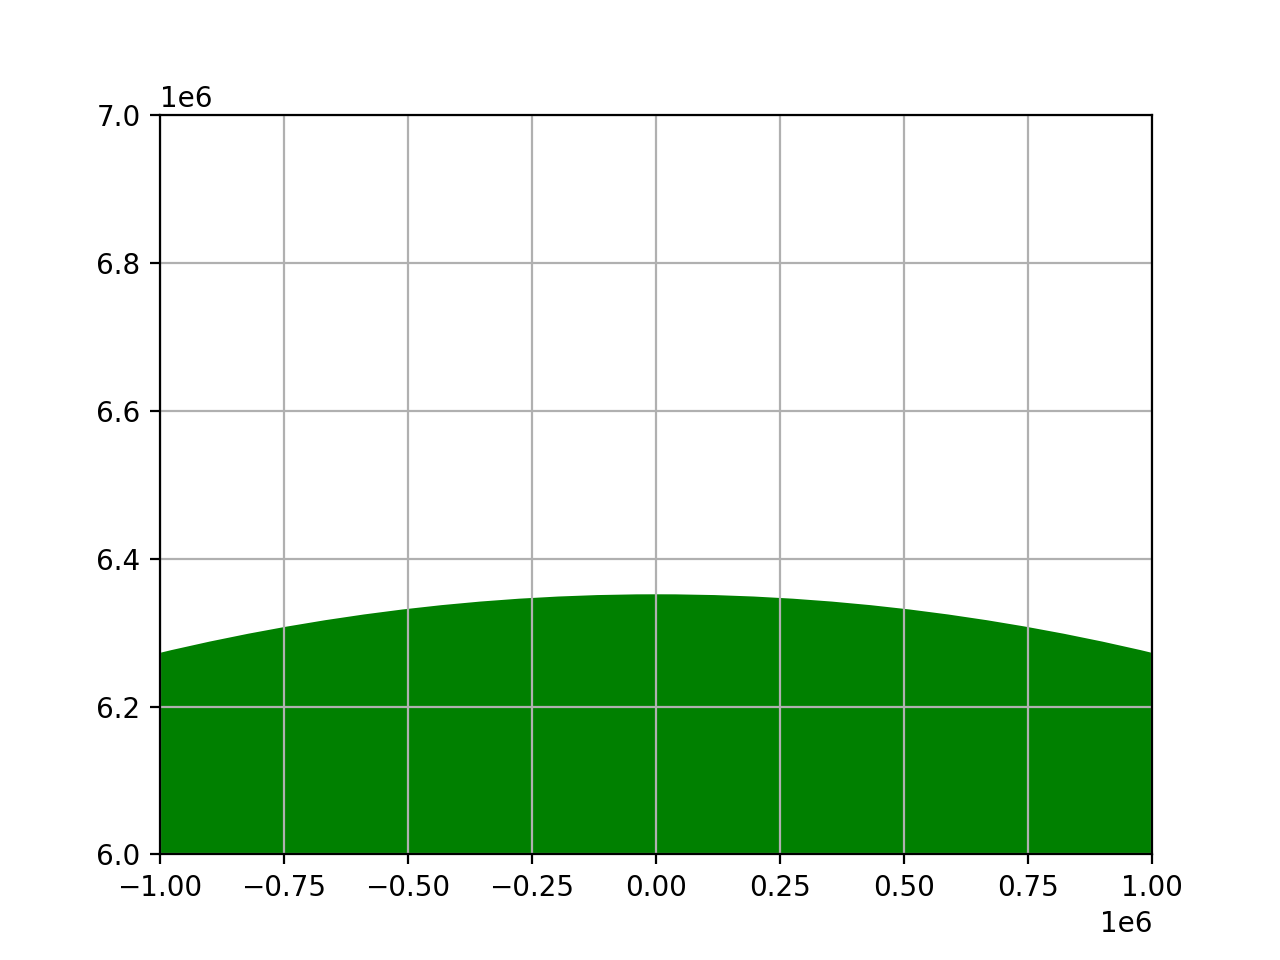

NameError: name 'matplotlib' is not defined

In [44]:
pl.ion() # interactive mode ON
fig = pl.figure()
pl.axis((-1e6,1e6,6e6,7e6)) # Define axis bounds in (assumed) meters
pl.grid(True) # Enable grid

# create green filled circle representing earth
earth = pl.Circle((0,0),float(d_earth/2.0/ur.m),color='g')
fig.gca().add_artist(earth)

# Add your Arrow-drawing code here

matplotlib.pyplot.arrow(0.0*ur.m,2.0,10000,2000,width=300000)


We've included code below (an 'event handler') that accepts mouse clicks on the left or right of the plot or the comma or period keys to adjust the global variable `T_angle`, rotating the thrust angle

In [ ]:
def event_handler(event):
    global T_angle
    if event.key==',': # press comma to rotate left
        # Rotate left (increase angle)
        T_angle += 10.0*ur.degree
        pass
    elif event.key=='.': # press period to rotate right
        # Rotate right (decrease angle)
        T_angle -= 10.0*ur.degree
        pass
    elif hasattr(event,"button") and event.button==1:
        if event.xdata < 0.0: 
            # Click on left-half of plot to
            # Rotate left (increase angle)
            T_angle += 10.0*ur.degree
            pass
        else:
            # Click on right-half of plot to
            # Rotate right (decrease angle)
            T_angle -= 10.0*ur.degree
            pass
        pass
    
    pass

# Connect this event handler to the figure so it is called
# when the mouse is clicked or keys are pressed. 
fig.canvas.mpl_connect('key_press_event',event_handler)
fig.canvas.mpl_connect('button_press_event',event_handler)


## Iterative update over time of mass, position, and velocity 
From here on we will be focusing on calculations that will be needed as you iterate over time going forward from launch. You will need to update the plot, evaluate thrust, evaluate loss of fuel mass, sum forces on the rocket, evaluate the rocket's change in velocity, and evaluate the rocket's change in position. 

### 6. Selecting a time step
If the calculations below are done properly the size of your time step doesn't matter much. The bigger it is, the faster things will run and making it smaller will slow down the simulation. 

You probably want the simulation running slower initially while you have to control the ascent. Then you want it to run faster so you can see the rocket behave in orbit. 

You should have defined a variable to represent fuel mass. You will need to change the fuel mass during the iteration. 

So write a conditional (`if` statement) based on whether there is fuel left to pick a time step `dt`. We used a time step of 1 second during the ascent and ten seconds after the fuel burn. Don't forget the time step should have units of seconds. 

In [40]:
if fuel_mass=0,dt=1*ur.s

SyntaxError: invalid syntax (<ipython-input-40-7d1e823d0353>, line 1)

### 7. Selecting a plot region
When controlling the rocket at early time you want to be zoomed in so you can see the rocket move and control it. Later you want to see the rocket orbit around the earth so you need to be zoomed out. 

We suggest a conditional based on whether there is fuel left to select either the zoomed in region used above:
```
pl.axis((-1e6,1e6,6e6,7e6)) # Define axis bounds in (assumed) meters
```
or a zoomed out region (we went from +/- ten thousand km in each axis).


In [46]:
pl.axis((-1e6,1e6,6e6,7e6))

(-1000000.0, 1000000.0, 6000000.0, 7000000.0)

### 8. Calculating the magnitude of the force of gravity
The rocket has two forces on it: Thrust and gravity, and we will need to evaluate both
to determine how the rocket accelerates. 

As discussed in lecture the force of gravity between two objects is 
$Gm_{1}m{2}/r^{2}$ where $G$ is the gravitational constant, $m_{1}$ and $m_{2}$ are the masses of the two objects, and $r$ is the distance between the object centers. 

Given the earth is centered over the origin, the radius $r$ between rocket and earth center would be the length (vector norm) of `pos`. Calculate $r$ and the magnitude of the force of gravity on the rocket. 

In [ ]:
# In the last lab we used np.linalg.norm() to find the magnitude of a vector.
# Unfortunately that function does not work with quantities that have units. 
# Instead, use this function norm() that does work with quantities that have units
def norm(vec):
    """Unit aware vector norm (magnitude)"""
    return np.sqrt(np.sum(vec**2.0))


# r =  # Should have units of distance (meters)
# F_Gravity = # Should have units of Force (N) or equivalent


### 9. Calculating the direction of the force of gravity
The force of gravity is attractive between the two objects. In this case we won't worry about the force of the rocket on the earth, only the force of the earth on the rocket which will point towards the center of the earth. 

Direction is often interpreted as a unit vector (vector with magnitude 1.0). So find the vector from the rocket to the center of the earth, and divide it by its magnitude to get the direction unit vector for the force of gravity:

Also multiply the force magnitude from above by the direction to get the vector force of gravity on the rocket.

In [ ]:
# 
# Direc_Gravity =    # Direction of gravity

# Vec_Gravity =     # Vector gravitational force on rocket

### 10. Calculating the thrust vector

The thrust vector is the thrust magnitude times the thrust direction. The thrust magnitude is either the full throttle thrust (specified above) if there is fuel left (fuel mass > 0) or zero Newtons. 

So you will need a conditional (`if...else` statement) to test whether there is fuel left and set the thrust vector appropriately. 

### 11. Determining the change in fuel mass over the time step
As the rocket ascends and burns off its fuel it loses mass (which helps it accelerate better). As discussed in lecture, the rate of change of mass is given by
$$ \frac{dm_{f}}{dt} = - TSFC\times T$$
where $m_{f}$ is the mass of the fuel, $TSFC$ is the thrust-specific fuel consumption, and $T$ is the thrust magnitude. 

Multiplying a finite timestep `dt` will give you a finite change in mass `dm_f`. Apply the change in mass to your fuel mass variable. 

Two things to be careful about:
  1. Test to make sure you have fuel left. You can't have thrust if there is no fuel. 
  2. When the fuel runs out applying the final change in mass may make the fuel mass go negative. As this would be a little weird, after applying the change in mass test whether the result is negative, and set the fuel mass to 0 kg in that case. 

### 12. Determining the change in velocity over the time step
From physics class you know $\sum F=ma$, and we can easily solve for $a$ to get $a=(\sum F)/m$. This can be used as a vector equation with vector forces to get a vector acceleration for the rocket.

So first calculate the vector sum of forces $\sum F$ acting on the rocket. This should include thrust and gravity. 

Second, divide by mass to get the acceleration. Remember to use the total rocket mass (empty mass plus mass of fuel plus mass of payload).

Third, recognize that $a$ can be interpreted as the rate of change of velocity $dv/dt$. Like you did for mass, multiply $dv/dt$ by a finite timestep `dt` to get a finite change in velocity `dv`. This should be a vector quantity with units of meters/second. 

Fourth, apply the change in velocity to the velocity variable `vel` 
to determine the new velocity after the time step.

### 13. Determining the change in position over the time step
Your velocity variable `vel` can be intepreted as a rate of change of position $d\mbox{pos}/dt$. Repeating the same process once more, multiply $d\mbox{pos}/dt$ by a finite timestep `dt` to get a finite change in position `dpos`. This should be a vector quantity with units of meters. 

Then apply the change in position to the variable `pos` to get the new position of the rocket

### 15. Creating a loop to iterate through time


In [ ]:
# You will need to paste the relevant code from above 
# into this template and run in Spyder. 
# Don't forget to type '%matplotlib qt'
# into the Spyder console before running to enable 
# the interactive plots
# 
# It should work in Jupyter notebook too but you 
# won't be able to detect keyboard input or mouse clicks
# to control the rocket. For it to work in Jupyter notebook, 
# you will need a '%matplotlib notebook' line at the top. 


# Template begins here
# --------------------

# Include import statements and unit registry from above
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as pl
import pint
ur = pint.UnitRegistry() 
# Include Rocket and planet characteristics; physics constants
empty_mass = 29500 * ur.kg
payload_mass = 1000 * ur.kg
fuel_mass = 480000 * ur.kg
tsfc = .00035 * (ur.s/ur.m)
full_thrust = 7600 * ur.kN
G = (6.674 * 10**-11) * ((ur.m**3)/(ur.kg*ur.s**2))
earth_mass = (5.98 * 10**24) * (ur.kg)
# Include earth diameter, surface speed, initial rocket position,
# initial rocket velocity

# Define initial thrust angle and direction

# Include code for the baseline plot and initial arrow

# Include the event handler

# Include the vector norm function from the 
# force of gravity calculation, above. 

t=0.0 * ur.s # Start at t=0

# Loop until ctrl-C or press stop button on 
# Spyder console or t exceeds 36000 seconds (10 hours
# of simulated time)

while t < 36000 * ur.s: 
    # Select the time step (code above)
    
    # Update the plot:     
    #  * Call arrowplt.remove() method on the old arrow
    #  * Calculate the thrust (rocket) direction from
    #    the rocket angle (code way above)
    #  * Plot the new arrow (code way above)
    #  * Label the fuel state in the plot title, e.g.
    #    pl.title("Fuel remaining %f kg" % ())
    #  * Show the time in the x axis label, e.g.
    #    pl.xlabel("Time = %f s" % ())
    #  * Select the plot region according to fuel state (code above)
    
    # These next two lines cause the plot display to refresh
    fig.canvas.draw()
    fig.canvas.flush_events()

    # Determine the forces on the rocket (code above): 
    #  * Calculate the magnitude of the force of gravity
    #  * Calculate the direction of the force of gravity
    #    and gravity vector on the rocket
    #  * Calculate the thrust vector
    
    # Update the fuel mass (code above)
    # Determine the change in velocity (code above)
    # Determine the change in position (code above)
    
    
    t = t + dt # Update the time
    pass  # End of loop block



### 16. Debugging
It is highly unlikely that the code you wrote above will work perfectly the first time. Debug the code until its behavior makes sense. Can you successfully get the rocket to orbit (even one that intersects the Earth)? Any thoughts as to why it is difficult or impossible to get into an orbit that doesn't intersect the Earth? 

(It is normal for the rocket to zip off at high speed should it reach the center of the earth). 



### 17. Additional capability. 
Modify your rocket simulator to give a substantial new and/or different capability. Be creative! Some ideas: Experiment with and be prepared to show/tell your lab TA about different scenarios -- different planet, orbiting around a star, faster rotating planet, etc.; rocket with multiple stages (like the real Falcon heavy); two rockets (multiplayer); multiple planets or suns orbiting each other (binary star system); autopilot that automatically sets thrust directions at particular times. 

If you are in an honors section you are expected to go into significant depth in your modifications. 

When you are happy with how it works, take a screenshot (on Windows computers pressing the Windows key and PrtSc at the same time should do this) of your rocket in orbit (OK for the orbit to intersect the Earth). Paste your completed code from Spyder back into the cell above. Re-execute everything, including your complete code. Download as html and submit to Canvas along with the screenshot. Be prepared to demonstrate in a future lab. 